This notebook covers the problem of determining water quality of Georgia's lakes and streams.
Based on my research, as of right now, the main parameters that determine the designated use 
of a body of water is determined by these parameters: dissolved oxygen (DO), water temperature,
ph, and the presence of contaminants. More specific criteria for designated uses of lakes are
chlorophyll-a, nutrients, and ph.


The National Water Quality Council has comprehensive water quality data for use in data analysis.
I downloaded a technical dataset with information on Georgia waterbodies from 365 days ago to today.

In [3]:
%matplotlib inline
import os
import math
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.options.display.max_columns = None

In [4]:
path = os.path.abspath(r"C:/Users/Dev/source/data analysis/data/raw/GA_yeardata.csv")
df = pd.read_csv(path)

In [5]:
df.head()

,Org_Identifier,Org_FormalName,Project_Identifier,Project_Name,Location_Identifier,Location_Name,Location_Type,Location_Description,Location_State,Location_CountryName,Location_CountyName,Location_CountryCode,Location_StatePostalCode,Location_CountyCode,Location_HUCEightDigitCode,Location_HUCTwelveDigitCode,Location_TribalLandIndicator,Location_TribalLand,Location_Latitude,Location_Longitude,Location_HorzCoordReferenceSystemDatum,Location_LatitudeStandardized,Location_LongitudeStandardized,Location_HorzCoordStandardizedDatum,Activity_ActivityIdentifier,Activity_ActivityIdentifierUserSupplied,Activity_TypeCode,Activity_Media,Activity_MediaSubdivisionName,ActivityBiological_AssemblageSampled,ActivityBiological_ToxicityTestType,Activity_Comment,ActivityLocation_Latitude,ActivityLocation_Longitude,ActivityLocation_HorzCoordReferenceSystemDatum,ActivityLocation_LatitudeStandardized,ActivityLocation_LongitudeStandardized,ActivityLocation_HorzCoordStandardizedDatum,ActivityLocation_Description,Activity_StartDate,Activity_StartTime,Activity_StartTimeZone,Activity_EndDate,Activity_EndTime,Activity_EndTimeZone,Activity_DepthHeightMeasure,Activity_DepthHeightMeasureUnit,Activity_BottomDepthAltitudeReferencePoint,Activity_ActivityRelativeDepth,Activity_TopDepthMeasure,Activity_TopDepthMeasureUnit,Activity_BottomDepthMeasure,Activity_BottomDepthMeasureUnit,Result_ResultDetectionCondition,Result_Characteristic,Result_CharacteristicUserSupplied,Result_CASNumber,Result_MethodSpeciation,Result_SampleFraction,ResultBiological_Intent,ResultBiological_IndividualIdentifier,ResultBiological_Taxon,ResultBiological_TaxonUserSupplied,ResultBiological_TaxonUserSuppliedReference,ResultBiological_SampleTissueAnatomy,ResultDepthHeight_Measure,ResultDepthHeight_MeasureUnit,Result_MeasureIdentifier,Result_Measure,Result_MeasureUnit,Result_MeasureQualifierCode,Result_MeasureStatusIdentifier,Result_StatisticalBase,Result_StatisticalNValue,Result_MeasureType,Result_WeightBasis,Result_TimeBasis,Result_MeasureTemperatureBasis,DataQuality_ResultComment,DetectionLimit_TypeA,DetectionLimit_MeasureA,DetectionLimit_MeasureUnitA,DetectionLimit_TypeB,DetectionLimit_MeasureB,DetectionLimit_MeasureUnitB,ResultAnalyticalMethod_Identifier,ResultAnalyticalMethod_IdentifierContext,ResultAnalyticalMethod_Name,ResultAnalyticalMethod_QualifierType,LabInfo_AnalysisStartDate,LabInfo_AnalysisStartTime,LabInfo_AnalysisStartTimeZone,LabInfo_LaboratoryComment,LabSamplePrepMethod_Identifier,LabSamplePrepMethod_IdentifierContext,LabSamplePrepMethod_Name,ProviderName,USGSpcode
0,USGS,U.S. Geological Survey,"[""USGS"",""250300370""]",NaN,USGS-02344400,"FLINT RIVER AT GA 92, ABOVE GRIFFIN, GA",Stream,NaN,Georgia,United States of America,Fayette County,US,GA,NaN,3130005,NaN,NaN,NaN,33.309283,-84.393258,NAD83,33.309283,-84.393258,NAD83,b710e356-37d6-4e0e-a531-8a16f0623a06,NaN,"Sample - Routine, regular",Water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-13,09:00:00,EDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS lot number,"NWIS lot number, buffer solution, pH 7, Nation...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00006255-cc72-43a1-b8a1-e7c2b2e5b6cd,20700,NaN,NaN,Provisional,NaN,NaN,Actual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS,99173
1,USGS,U.S. Geological Survey,"[""USGS"",""00003LBGA""]",NaN,USGS-02207400,"BRUSHY FORK CREEK AT BEAVER ROAD, NR LOGANVILL...",Stream,NaN,Georgia,United States of America,Gwinnett County,US,GA,NaN,3070103,NaN,NaN,NaN,33.821389,-83.942500,NAD83,33.821389,-83.942500,NAD83,c062dfd5-e6c5-4fb0-9851-1a9e5a63b359,NaN,"Sample - Routine, regular",Water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-30,08:25:00,EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total Coliform,"Total coliforms (most probable number), water,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0001e8ce-e785-45e7-8ce7-7a72e9d0c858,29000,MPN/100mL,NaN,Provisional,NaN,NaN,Actual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAC4

There is 63 columns. We don't need most if it. I'm only interested in Location_Identifier, Location_Name, Location_Type, Result_Characteristic, Result_CharacteristicUserSupplied, Result_Measure, Result_MeasureUnit, Activity_StartDate, and Activity_StartTime.
I need to take all of the values in Result_Characteristic and divide that into their own columns. I need to put the Result Measure into that new columns.

In [7]:
df1 = df[['Location_Identifier','Location_Type','Activity_StartDate','Activity_StartTime',
          'Result_Characteristic','Result_Measure','Result_MeasureUnit']]
df1 = df1[pd.to_numeric(df1['Result_Measure'], errors='coerce').notnull()] #This rids of all categorical information and na values in the column.
df1 = df1.astype({'Result_Measure':float})

In [8]:
df1 = pd.pivot_table(df1,index="Location_Identifier", columns=["Result_Characteristic"], values="Result_Measure", aggfunc={'Result_Measure': 'mean'})

In [9]:
df1

Result_Characteristic,"1-(3,4-dichlorophenyl)-3-methyl urea","1H-1,2,4-Triazole","1H-Pyrazole-3-carboxamide, 5-amino-1-[2,6-dichloro-4-(trifluoromethyl)phenyl]-4-[(trifluoromethyl)sulfinyl]-","2,4-D","2,4-D-d3","2-Chloro-4,6-diamino-s-triazine",2-Chloro-4-isopropylamino-6-amino-s-triazine,2-Hydroxyatrazine,3-Phenoxybenzoic acid-13C6,4-Hydroxychlorothalonil,Acephate,Acetochlor-d11,"Acidity, (H+)",Alkalinity,Aminomethylphosphonic acid,Ammonia and ammonium,Arsenic,Atrazine,Azoxystrobin,Barometric pressure,Bentazon,Bicarbonate,"Biochemical oxygen demand, standard conditions",Boron,Bromacil,Bromide,Butachlor ESA,Cadmium,Calcium,Carbaryl,Carbaryl-d7,Carbendazim,Carbendazim-d4,Carbofuran-D3,Carbon,Carbon dioxide,Carbonate,"Chemical oxygen demand, (high level)",Chloride,Copper,Dechlorometolachlor,Deethylatrazine-d6,Deethylhydroxyatrazine,Depth,Depth of water column,Desisopropyl atrazine,Diazinon-D10,Diflubenzuron-d4,Dimethachlor sulfonic acid,Dimethenamid,Dissolved oxygen (DO),Dissolved oxygen saturation,Diuron,Diuron-d6,Elapsed time,Escherichia coli,Fipronil,Fipronil Desulfinyl,Fipronil Sulfide,Fipronil Sulfone,Fixed suspended solids,Fluoride,Glyphosate,HF183/BacR287 DNA marker,Halosulfuron-methyl,"Hardness, Ca, Mg","Hardness, non-carbonate","Height, gage",Hexazinone,Hexazinone-d6,Human adenovirus,Human enterovirus,Human norovirus,Human polyomavirus,Hydroxide,Hydroxymetolachlor,Hydroxysimazine,Imazethapyr,Imidacloprid,Inorganic carbon,Inorganic nitrogen (nitrate and nitrite),Iron,Kjeldahl nitrogen,Lead,Linuron-d6,Lithium,Magnesium,Malathion-D10,Manganese,Metalaxyl,Methoxyfenozide,Metochlor ESA,Metolachlor,Metolachlor-d6,Myclobutanil,NWIS lot number,Nicosulfuron-d6,Nitrate,Nitrite,Nitrogen,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Number of sampling points,Organic Nitrogen,Organic carbon,Orthophosphate,Phosphate-phosphorus,Phosphorus,Potassium,Prometon,Propiconazole,Propoxur,Pyraclostrobin,Sample location,"Sample time, elapsed",Sediment,Selenium,Silica,Simazine,Sodium,Sodium adsorption ratio [(Na)/(sq root of 1/2 Ca + Mg)],"Sodium, percent total cations",Specific conductance,Stream flow,"Stream flow, instantaneous","Stream flow, max, storm event","Stream flow, mean, storm event","Stream flow, median, storm event",Stream width measure,Strontium,Sulfate,Sulfentrazone,Sulfometuron methyl,Suspended Sediment Concentration (SSC),Suspended Sediment Discharge,Tebuconazole,Tebuconazole-d6,Tebuthiuron,"Temperature, air","Temperature, water",Tetraconazole,Thiobencarb,Thiobencarb-d10,Total Coliform,Total dissolved solids,Total suspended solids,Triclopyr,Turbidity,Vanadium,Velocity of water,Volatile suspended solids,Volume of sample,Volume of water filtered,Zinc,cis-Permethrin-13C6,pH
Location_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
USGS-02197065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214,17.000000,NaN,0.095308,NaN,NaN,NaN,762.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.142105,99.928571,NaN,NaN,0.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207273,NaN,0.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26883.914894,NaN,NaN,NaN,NaN,1.526667,3.947368,0.322000,4.463636,0.131500,NaN,0.095455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.586207,NaN,4437.892857,NaN,NaN,NaN,386.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.626316,20.410526,NaN,NaN,NaN,NaN,NaN,5.900000,NaN,6.170000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.966667
USGS-02198500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000154,23.700000,NaN,0.059000,NaN,NaN,NaN,764.235294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.316667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.864706,86.923077,NaN,NaN,NaN,43.250000,NaN,NaN,NaN,NaN,NaN,N

In [10]:
df1.loc['USGS-02197065']

Result_Characteristic
1-(3,4-dichlorophenyl)-3-methyl urea                                                                                     NaN
1H-1,2,4-Triazole                                                                                                        NaN
1H-Pyrazole-3-carboxamide, 5-amino-1-[2,6-dichloro-4-(trifluoromethyl)phenyl]-4-[(trifluoromethyl)sulfinyl]-             NaN
2,4-D                                                                                                                    NaN
2,4-D-d3                                                                                                                 NaN
2-Chloro-4,6-diamino-s-triazine                                                                                          NaN
2-Chloro-4-isopropylamino-6-amino-s-triazine                                                                             NaN
2-Hydroxyatrazine                                                                                      

In [11]:
missing = pd.concat([df1.isnull().sum(), 100 * df1.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count').head(25)

,Count,%
Result_Characteristic,,
Specific conductance,0,0.000000
"Temperature, water",0,0.000000
Turbidity,1,1.136364
pH,3,3.409091
Dissolved oxygen (DO),3,3.409091
Barometric pressure,3,3.409091
Dissolved oxygen saturation,4,4.545455
"Acidity, (H+)",4,4.545455
NWIS lot number,6,6.818182


I'm interested in Specific conductance, Temperature of water, Turbidity, pH, Dissolved oxygen (DO), Dissolved oxygen saturation, Barometric pressure, Acidity, (H+), Temperature of air, Hardness, Organic carbon, Stream width measure, Inorganic nitrogen (nitrate and nitrite), Phosphorus, Kjeldahl nitrogen, Height gage, Nitrogen, Total suspended solids, Stream flow, Escherichia coli, Alkalinity, Carbon dioxide, Ammonia and ammonium.

I need to consolidate some of the columns together as they could measure the same factor but in a different way. I'll look through for any NA values between two similar parameters to see if I can fill in a NA value. If there is none, I'll take the parameter with less NA values.

Dissolved oxygen (DO), Dissolved oxygen saturation,
Stream flow and instant Stream flow
All the nitrogen columns may be able to supplement each other. But they also may be able to show correlations between each compounent of nitrogen.

Tier 1 parameters: DO, pH, Water Temp, E. coli
Tier 2 parameters: everything else

Tier 1 parameters directly cause a waterbody to fail a designated use if their thresholds aren't met.
Tier 2 parameters are factors that may infuence Tier 1 parameters.
The target parameters are Tier 1, make sure they are in the thresholds and what could correlate with them failing.


In [13]:
df1_tier1 = df1[['Dissolved oxygen (DO)','pH','Temperature, water','Escherichia coli']]
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, USGS-02197065 to USGS-03567340
Data columns (total 155 columns):
 #    Column                                                                                                        Dtype  
---   ------                                                                                                        -----  
 0    1-(3,4-dichlorophenyl)-3-methyl urea                                                                          float64
 1    1H-1,2,4-Triazole                                                                                             float64
 2    1H-Pyrazole-3-carboxamide, 5-amino-1-[2,6-dichloro-4-(trifluoromethyl)phenyl]-4-[(trifluoromethyl)sulfinyl]-  float64
 3    2,4-D                                                                                                         float64
 4    2,4-D-d3                                                                                                      float64
 5    2-Ch

In [14]:
#pH similarities
df1_similar_ph = df1[['pH','Alkalinity','Acidity, (H+)']]
df1_similar_ph.loc[df1_similar_ph['pH'].isna()]
#I'll only keep ph

df1_similar_ph.drop(columns=['Alkalinity','Acidity, (H+)'], axis=1, inplace=True)
df1_similar_ph

C:\Users\Dev\AppData\Local\Temp\ipykernel_19092\811340654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_similar_ph.drop(columns=['Alkalinity','Acidity, (H+)'], axis=1, inplace=True)


Result_Characteristic,pH
Location_Identifier,
USGS-02197065,6.966667
USGS-02198500,7.092593
USGS-02202190,7.011538
USGS-02203831,7.200000
USGS-02203863,7.053571
USGS-02203873,7.037037
USGS-02203900,7.233333
USGS-02203950,7.010000
USGS-02203960,7.280645


In [15]:
#Dissolved Oxygen similiarities
df1_similar_oxygen = df1[['Dissolved oxygen (DO)','Dissolved oxygen saturation']]
df1_similar_oxygen.loc[df1_similar_oxygen['Dissolved oxygen (DO)'].isna()]
#I will drop saturation

df1_similar_oxygen.drop(columns=['Dissolved oxygen saturation'], axis=1, inplace=True)

C:\Users\Dev\AppData\Local\Temp\ipykernel_19092\3449862837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_similar_oxygen.drop(columns=['Dissolved oxygen saturation'], axis=1, inplace=True)


In [16]:
#Hardness similiarities
df1_similar_hardness = df1[['Hardness, Ca, Mg','Hardness, non-carbonate']]
df1_similar_hardness.loc[df1_similar_hardness['Hardness, Ca, Mg'].isna()]
#Looks good, I can drop Hardness, non-carbonate as it measures the same parameter.

df1_similar_hardness.drop(columns=['Hardness, non-carbonate'], axis=1, inplace=True)

C:\Users\Dev\AppData\Local\Temp\ipykernel_19092\1416311918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_similar_hardness.drop(columns=['Hardness, non-carbonate'], axis=1, inplace=True)


Nitrogen and ammonia similarities: 
Based on further research, I will keep all of them and not consolidate 
them as they can tell different parts of the story with where these pollutants might come from

In [18]:
#Nitrogen Approximations and Consolidations
df1_similar_nitro = df1[['Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)','Kjeldahl nitrogen','Ammonia and ammonium','Organic Nitrogen',
                         'Inorganic nitrogen (nitrate and nitrite)','Nitrate','Nitrite','Nitrogen']]
df1_similar_nitro[df1_similar_nitro.isna().any(axis=1)]

#I can calculate Total Nitro because Total Nitro = Kjeldahl + Nitrogen + Inorganic
# 0 occurences
#I can calculate Kjeldahl because Kjeldahl = Organic + Ammonia and Ammonium
# USGS-02338523	0.265556	NaN	0.030333	0.120000	0.143333	0.4635	0.010000	NaN
# 1 occurence
#I can calculate Ammonia and Ammonium because Ammonia and Ammonium = Kjeldahl - Organic and vice versa with Organic
# USGS-02202190	1.484000	0.512000	0.030000	NaN	0.153778	NaN	NaN	NaN
# USGS-02203831	6.183333	1.396667	0.365000	NaN	0.625000	NaN	NaN	NaN
# USGS-02203863	4.893750	1.140000	0.065000	NaN	0.563333	NaN	NaN	NaN
# USGS-02208005	4.490000	0.333000	0.054333	NaN	1.066364	NaN	NaN	Na
# USGS-02338000	2.489231	0.591923	0.249091	NaN	1.985923	NaN	0.059692	0.346750
# USGS-02338660	1.230000	0.258000	0.044000	NaN	0.286667	NaN	NaN	NaN
# USGS-02338840	0.795000	0.276667	0.037000	NaN	0.132167	NaN	NaN	NaN
# USGS-02344400	1.580000	0.316667	0.043000	NaN	0.347273	NaN	NaN	NaN
# 8 occurences
#I can calculate most of the N2 values because N2 = Total Nitro - Kjeldahl - Inorganic
# USGS-02197065	1.526667	0.380000	0.095308	0.322000	0.207273	NaN	NaN	NaN
# USGS-02198500	1.593750	0.371250	0.059000	0.530000	0.229000	NaN	NaN	NaN
# USGS-02202190	1.484000	0.512000	0.030000	NaN	0.153778	NaN	NaN	NaN
# USGS-02203831	6.183333	1.396667	0.365000	NaN	0.625000	NaN	NaN	NaN
# USGS-02203863	4.893750	1.140000	0.065000	NaN	0.563333	NaN	NaN	NaN
# USGS-02203873	3.581667	0.793333	0.191400	0.620000	0.541667	NaN	NaN	NaN
# USGS-02203900	7.333333	1.400000	0.086333	5.000000	0.570000	NaN	NaN	NaN
# USGS-02203950	5.033000	1.141429	0.033750	0.130000	0.444286	NaN	NaN	NaN
# USGS-02203960	5.155000	1.234286	0.074000	1.390000	0.388571	NaN	NaN	NaN
# USGS-02204037	5.036250	1.150000	0.063000	1.300000	0.258333	NaN	NaN	NaN
# USGS-02204520	6.741667	0.388182	0.112375	0.283333	1.721818	NaN	NaN	NaN
# USGS-02205000	2.416667	0.518000	NaN	NaN	0.558000	NaN	NaN	NaN
# USGS-02205865	1.993750	0.568333	0.086333	0.410000	0.218333	NaN	NaN	NaN
# USGS-02206500	4.766667	0.584000	NaN	NaN	0.872500	NaN	NaN	NaN
# USGS-02207120	4.057500	0.560000	0.033250	0.730000	0.860000	NaN	NaN	NaN
# USGS-02207135	3.559000	0.415714	0.057800	0.625000	0.925714	NaN	NaN	NaN
# USGS-02207160	4.328750	1.118333	0.089875	1.733333	0.174000	NaN	NaN	NaN
# USGS-02207185	3.103750	1.460000	NaN	NaN	0.478000	NaN	NaN	NaN
# USGS-02207385	4.101000	0.857143	0.243250	1.020000	0.645714	NaN	NaN	NaN
# USGS-02207400	2.077500	0.491429	0.046333	0.410000	0.291667	NaN	NaN	NaN
# USGS-02208005	4.490000	0.333000	0.054333	NaN	1.066364	NaN	NaN	NaN
# USGS-02208150	5.250000	0.874000	0.342333	0.710000	0.407500	NaN	NaN	NaN
# USGS-02209260	1.285000	0.331429	NaN	NaN	0.252727	NaN	NaN	NaN
# USGS-02209750	1.226667	0.413636	0.298857	0.191667	0.108000	NaN	NaN	NaN
# USGS-02212940	1.889000	0.325556	0.054000	0.180000	0.428182	NaN	NaN	NaN
# USGS-02215000	2.157000	0.364000	0.077500	0.370000	0.451818	NaN	NaN	NaN
# USGS-02215500	1.743000	0.393750	NaN	NaN	0.357273	NaN	NaN	NaN
# USGS-02217274	3.000000	1.246667	0.093000	0.680000	0.504000	NaN	NaN	NaN
# USGS-02218000	4.733333	0.302500	0.052333	0.160000	1.373636	NaN	NaN	NaN
# USGS-02218565	2.856667	1.373333	0.058000	1.300000	0.396000	NaN	NaN	NaN
# USGS-02223600	1.544167	0.410000	0.089667	0.345000	0.224909	NaN	NaN	NaN
# USGS-02226010	1.980833	0.480000	0.070700	0.307500	0.260909	NaN	NaN	NaN
# USGS-02226582	3.040000	0.884545	0.051500	0.900000	0.257800	NaN	NaN	NaN
# USGS-02318940	2.184167	0.641000	0.041500	0.600000	0.187818	NaN	NaN	NaN
# USGS-02328200	3.254167	0.634545	0.053111	0.495000	0.450636	NaN	NaN	NaN
# USGS-02332017	2.430000	0.260000	0.043000	0.330000	0.662727	NaN	NaN	NaN
# USGS-02333970	1.840000	0.230000	NaN	NaN	0.364545	NaN	NaN	NaN
# USGS-02334140	22.241667	3.220909	3.725000	1.092000	2.950909	NaN	NaN	NaN
# USGS-02334480	7.312500	1.970000	0.168444	3.866667	0.611429	NaN	NaN	NaN
# USGS-02334578	2.398333	0.560000	0.063800	0.685000	0.356000	NaN	NaN	NaN
# USGS-02334885	4.813750	1.247143	0.050400	2.570000	0.716667	NaN	NaN	NaN
# USGS-02335350	3.534000	0.891429	0.071333	0.620000	0.278571	NaN	NaN	NaN
# USGS-02335350	3.534000	0.891429	0.071333	0.620000	0.278571	NaN	NaN	NaN
# USGS-02336030	2.816667	1.360000	0.085000	0.885000	0.305000	NaN	NaN	NaN
# USGS-02336120	4.292500	0.721667	0.057250	1.900000	0.441667	NaN	NaN	NaN
# USGS-02336152	3.208333	0.647500	0.051750	0.600000	0.418750	NaN	NaN	NaN
# USGS-023362095	4.992500	1.040000	0.027000	2.635000	0.450000	NaN	NaN	NaN
# USGS-02336240	5.718750	1.243333	0.042500	0.290000	0.551667	NaN	NaN	NaN
# USGS-02336340	5.640000	1.291667	0.075714	2.160000	0.375000	NaN	NaN	NaN
# USGS-02338500	7.375000	0.568462	0.239923	0.580000	1.961538	NaN	NaN	NaN
# USGS-02338523	0.265556	NaN	0.030333	0.120000	0.143333	0.4635	0.010000	NaN
# USGS-02338660	1.230000	0.258000	0.044000	NaN	0.286667	NaN	NaN	NaN
# USGS-02338720	4.811667	0.480833	0.193375	0.366667	1.204167	NaN	NaN	NaN
# USGS-02338840	0.795000	0.276667	0.037000	NaN	0.132167	NaN	NaN	NaN
# USGS-02342881	2.775000	0.374545	0.076538	0.262000	0.591818	NaN	NaN	NaN
# USGS-02344040	1.950000	0.330000	0.068000	0.266000	0.442727	NaN	NaN	NaN
# USGS-02344400	1.580000	0.316667	0.043000	NaN	0.347273	NaN	NaN	NaN
# USGS-02349605	1.430000	0.314000	0.217500	0.150000	0.228364	NaN	NaN	NaN
# USGS-02352560	1.685000	0.381111	0.041800	0.400000	0.362727	NaN	NaN	NaN
# USGS-02353000	2.288333	0.362500	NaN	NaN	0.649091	NaN	NaN	NaN
# USGS-02356000	3.708333	0.298000	NaN	NaN	0.990000	NaN	NaN	NaN
# USGS-02380500	4.575000	0.411818	0.126143	0.260000	0.975833	NaN	NaN	NaN
# USGS-02384750	1.987500	0.325000	0.046000	0.390000	0.275800	NaN	NaN	NaN
# USGS-02387000	1.820000	0.335000	NaN	NaN	0.285556	NaN	NaN	NaN
# USGS-02388520	2.265000	0.515000	0.040000	NaN	0.398182	NaN	NaN	NaN
# USGS-02392000	1.415000	0.243333	NaN	NaN	0.272727	NaN	NaN	NaN
# USGS-02392360	0.985000	0.856667	NaN	NaN	0.129900	NaN	NaN	NaN
# USGS-02392780	5.183333	0.469091	0.129750	0.395000	1.307273	NaN	NaN	NaN
# USGS-02393000	18.675000	0.570909	0.113571	0.610000	5.345455	NaN	NaN	NaN
# USGS-02394980	2.226000	0.348750	0.089143	0.350000	0.521818	NaN	NaN	NaN
# USGS-02398037	4.307000	0.392000	NaN	NaN	0.890000	NaN	NaN	NaN
# USGS-02411930	1.105000	0.223333	NaN	NaN	0.139833	NaN	NaN	NaN
# USGS-02413210	2.195000	0.367273	0.087000	0.370000	0.424167	NaN	NaN	NaN
# USGS-03567340	3.056250	0.270000	NaN	NaN	0.781818	NaN	NaN	NaN
# 74 occurences
# Calculate Nitrate because Nitrate = Inorganic - Nitrite
# USGS-02338000	2.489231	0.591923	0.249091	NaN	1.985923	NaN	0.059692	0.346750
# USGS-02394682	NaN	0.320000	NaN	NaN	0.147000	NaN	0.002000	NaN
# 2 occurences

Result_Characteristic,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Ammonia and ammonium,Organic Nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrate,Nitrite,Nitrogen
Location_Identifier,,,,,,,,
USGS-02197065,1.526667,0.380000,0.095308,0.322000,0.207273,NaN,NaN,NaN
USGS-02198500,1.593750,0.371250,0.059000,0.530000,0.229000,NaN,NaN,NaN
USGS-02202190,1.484000,0.512000,0.030000,NaN,0.153778,NaN,NaN,NaN
USGS-02203831,6.183333,1.396667,0.365000,NaN,0.625000,NaN,NaN,NaN
USGS-02203863,4.893750,1.140000,0.065000,NaN,0.563333,NaN,NaN,NaN
USGS-02203873,3.581667,0.793333,0.191400,0.620000,0.541667,NaN,NaN,NaN
USGS-02203900,7.333333,1.400000,0.086333,5.000000,0.570000,NaN,NaN,NaN
USGS-02203950,5.033000,1.141429,0.033750,0.130000,0.444286,NaN,NaN,NaN
USGS-02203960,5.155000,1.234286,0.074000,1.390000,0.388571,NaN,NaN,NaN


In [19]:
for index, row in df1_similar_nitro.iterrows():
    if math.isnan(row['Kjeldahl nitrogen']) and (math.isnan(row['Ammonia and ammonium']) == False and math.isnan(row['Organic Nitrogen']) == False):
        row['Kjeldahl nitrogen'] = row['Ammonia and ammonium'] + row['Organic Nitrogen']
    if math.isnan(row['Ammonia and ammonium']) and (math.isnan(row['Kjeldahl nitrogen']) == False and math.isnan(row['Organic Nitrogen']) == False):
        row['Ammonia and ammonium'] = row['Kjeldahl nitrogen'] - row['Organic Nitrogen']
    if math.isnan(row['Organic Nitrogen']) and (math.isnan(row['Kjeldahl nitrogen']) == False and math.isnan(row['Ammonia and ammonium']) == False):
        row['Organic Nitrogen'] = row['Kjeldahl nitrogen'] - row['Ammonia and ammonium']
    if math.isnan(row['Nitrogen']) and (math.isnan(row['Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)']) == False and math.isnan(row['Kjeldahl nitrogen']) == False and math.isnan(row['Inorganic nitrogen (nitrate and nitrite)']) == False):
        print(math.isnan(row['Nitrogen']) and (math.isnan(row['Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)']) == False and math.isnan(row['Kjeldahl nitrogen']) == False and math.isnan(row['Inorganic nitrogen (nitrate and nitrite)']) == False))    
        row['Nitrogen'] = row['Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)'] - row['Kjeldahl nitrogen'] - row['Inorganic nitrogen (nitrate and nitrite)']
    if math.isnan(row['Nitrate']) and (math.isnan(row['Inorganic nitrogen (nitrate and nitrite)']) == False and math.isnan(row['Nitrite']) == False):
        row['Nitrate'] = row['Inorganic nitrogen (nitrate and nitrite)'] - row['Nitrite']

# Check: df1_similar_nitro.loc['USGS-02338000']
df1_similar_nitro = df1_similar_nitro.drop(columns=['Nitrate','Nitrite', 'Ammonia and ammonium', 'Organic Nitrogen'])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [20]:
df1_similar_nitro.head()

Result_Characteristic,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen
Location_Identifier,,,,
USGS-02197065,1.526667,0.380000,0.207273,0.939394
USGS-02198500,1.593750,0.371250,0.229000,0.993500
USGS-02202190,1.484000,0.512000,0.153778,0.818222
USGS-02203831,6.183333,1.396667,0.625000,4.161667
USGS-02203863,4.893750,1.140000,0.563333,3.190417


In [21]:
#Stream Flow
#Stream flow, instantaneous Stream flow Velocity of water
df1_similar_flow = df1[['Stream flow','Stream flow, instantaneous','Velocity of water']]
df1_similar_flow.loc[df1_similar_flow['Stream flow, instantaneous'].isna()]

Result_Characteristic,Stream flow,"Stream flow, instantaneous",Velocity of water
Location_Identifier,,,
USGS-02205000,NaN,NaN,NaN
USGS-02209260,NaN,NaN,NaN
USGS-02209750,NaN,NaN,NaN
USGS-02332017,NaN,NaN,NaN
USGS-02334140,NaN,NaN,NaN
USGS-02335000,1155.652174,NaN,NaN
USGS-02335880,1762.621622,NaN,NaN
USGS-02336000,1823.736111,NaN,NaN
USGS-02336503,NaN,NaN,NaN


I will have to supplement the data with a CSV sheet I found for the stream flow of these sites. It's important to note that the instant stream flow
is the mean of the stream flows over the last year.


In [23]:
df1_similar_flow.loc[df1_similar_flow['Stream flow'].isna()].head()

Result_Characteristic,Stream flow,"Stream flow, instantaneous",Velocity of water
Location_Identifier,,,
USGS-02197065,NaN,4437.892857,NaN
USGS-02198500,NaN,4847.190476,NaN
USGS-02202190,NaN,1136.458333,NaN
USGS-02203831,NaN,4.622581,NaN
USGS-02203863,NaN,12.588000,NaN


In [24]:
for index, row in df1_similar_flow.iterrows():
    if math.isnan(row['Stream flow']) and (math.isnan(row['Stream flow, instantaneous']) == False):
        row['Stream flow'] = row['Stream flow, instantaneous']
df1_similar_flow['Stream flow']
df1_similar_flow.shape

(88, 3)

In [25]:
#Read real_ga.xml as a Dataframe
streams = pd.read_xml('real_ga.xml')
streams.index = 'USGS-0' + streams['id'].astype('str')
streams.index
streams_flowinfo = streams[['id','flowinfo']]
streams_flowinfo['flowinfo'].astype('string')
streams_flowinfo = streams_flowinfo[streams_flowinfo.flowinfo.str.startswith('"D')] #This took about three hours to figure out
streams_flowinfo
#Split the string up
streams_flowinfo = streams_flowinfo.flowinfo.str.split(expand = True)
streams_flowinfo = streams_flowinfo[1]

In [26]:
#Identify rows based on id
merged_streams = pd.merge(df1_similar_flow, streams_flowinfo, how='left',left_index=True, right_index=True)
for index, row in merged_streams.iterrows():
    if math.isnan(row['Stream flow']):
        row['Stream flow'] = row[1]
merged_streams.drop(columns=['Stream flow, instantaneous', 'Velocity of water', 1], axis=1, inplace=True)
merged_streams.head()

,Stream flow
Location_Identifier,
USGS-02197065,4437.892857
USGS-02198500,4847.190476
USGS-02202190,1136.458333
USGS-02203831,4.622581
USGS-02203863,12.588000


Combine all the tables.

In [28]:
merged_df = pd.merge(merged_streams, df1_similar_nitro, left_index=True, right_index=True)

In [29]:
merged_df = pd.merge(merged_df, df1_similar_hardness, left_index=True, right_index=True)

In [30]:
merged_df = pd.merge(merged_df, df1_similar_oxygen, left_index=True, right_index=True)

In [31]:
merged_df = pd.merge(merged_df, df1_similar_ph, left_index=True, right_index=True)

In [32]:
df1 = df1[['Temperature, water','Turbidity','Barometric pressure','Temperature, air','Specific conductance',
            'Organic carbon','Stream width measure','Phosphorus','Total suspended solids','Escherichia coli','Carbon dioxide']]
merged_df = pd.merge(merged_df, df1, left_index=True, right_index=True)
merged_df
# I dropping the sites with over half of their parameters missing: USGS-02336503, 
# USGS-023365037 (this one is near the sampling point of USGS-02336503, USGS-02336504, USGS-02335880, USGS-02336526

merged_df = merged_df.drop(['USGS-023365037','USGS-02336503','USGS-02336504', 'USGS-02335880','USGS-02336000','USGS-02336526', ])

In [33]:
merged_df.shape

(82, 19)

In [34]:
merged_df.describe()

,Stream flow,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen,"Hardness, Ca, Mg",Dissolved oxygen (DO),pH,"Temperature, water",Turbidity,Barometric pressure,"Temperature, air",Specific conductance,Organic carbon,Stream width measure,Phosphorus,Total suspended solids,Escherichia coli,Carbon dioxide
count,75.000000,76.000000,79.000000,79.000000,76.000000,79.000000,81.000000,81.000000,82.000000,81.000000,81.000000,81.000000,82.000000,79.000000,78.000000,78.000000,75.000000,68.000000,64.000000
mean,693.387440,3.607976,0.663233,0.607569,2.320482,28.687293,8.464742,7.161905,17.862936,33.377329,743.635873,20.386659,106.547905,5.449004,133.705428,0.099916,117.835643,595.699366,4.198698
std,1528.436221,3.293104,0.488647,0.722439,2.394098,22.981735,0.777107,0.449721,2.488439,36.660125,12.118641,5.862778,89.837931,4.990733,145.387676,0.106954,173.341570,634.336522,2.283671
min,0.380000,0.265556,0.150333,0.033667,-0.028111,3.636364,6.331250,4.066667,12.568889,1.954545,700.947368,10.771429,14.791667,1.741765,6.100000,0.025000,5.118182,9.000000,0.883333
25%,16.950941,1.835000,0.341875,0.259621,1.063875,16.816667,7.994444,7.035484,16.025694,9.063636,737.210526,17.837931,68.635312,3.741667,26.189935,0.050909,10.862222,139.916667,2.762500
50%,64.060000,2.836667,0.480833,0.424167,1.442947,22.142857,8.568182,7.160000,17.130466,17.972727,740.235294,19.670000,88.772619,4.220000,67.442857,0.078563,21.509091,341.750000,3.583333
75%,629.128125,4.741667,0.879273,0.635357,3.127292,31.984848,9.090476,7.318519,20.244712,52.860000,745.115385,21.886667,119.638889,5.510455,197.354167,0.112104,180.059524,864.500000,4.833333
max,10268.250000,22.241667,3.220909,5.345455,16.069848,140.909091,10.300000,7.968966,22.062500,234.474074,765.000000,63.370588,764.076923,40.454545,608.166667,0.887000,986.500000,2424.666667,10.969231


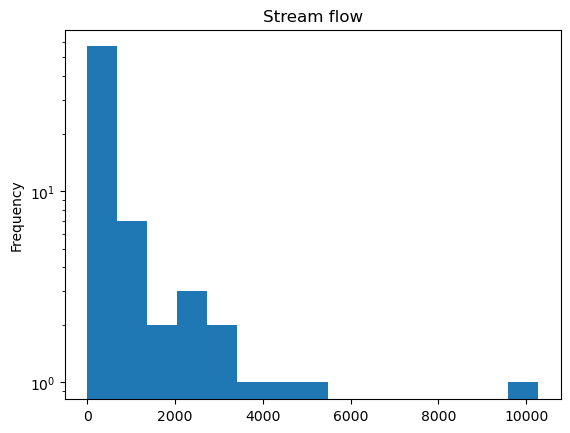

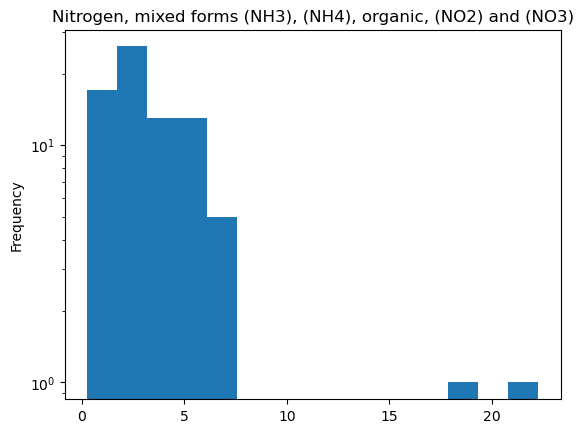

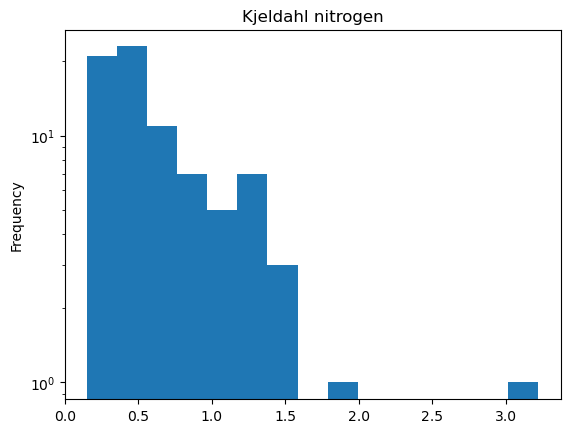

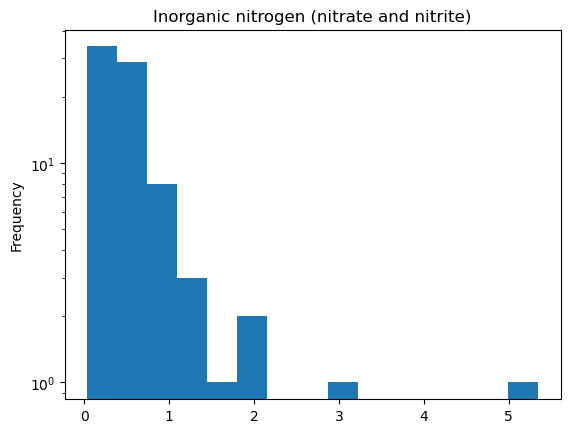

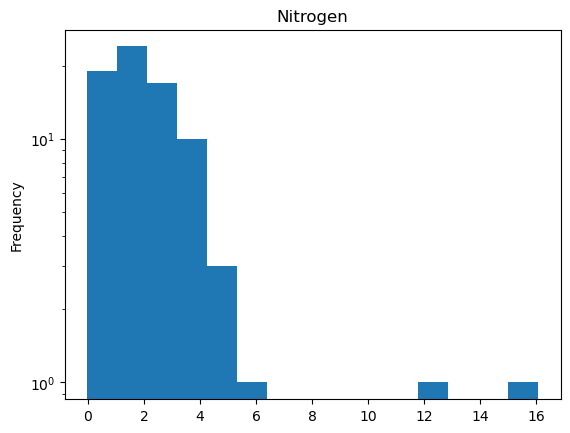

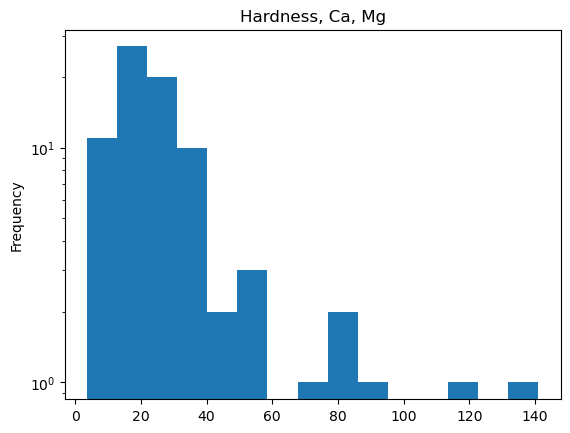

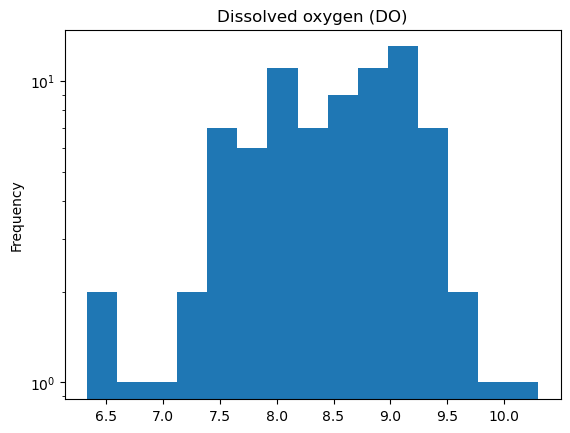

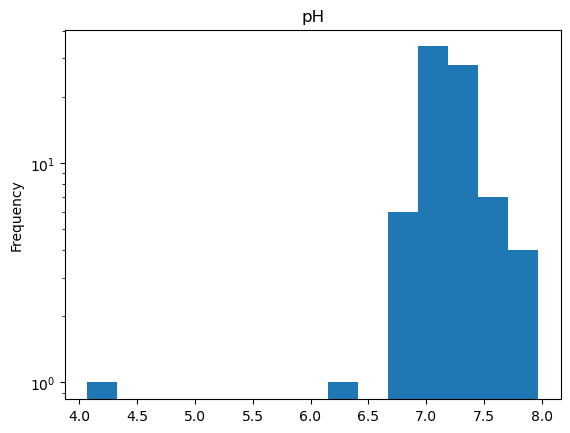

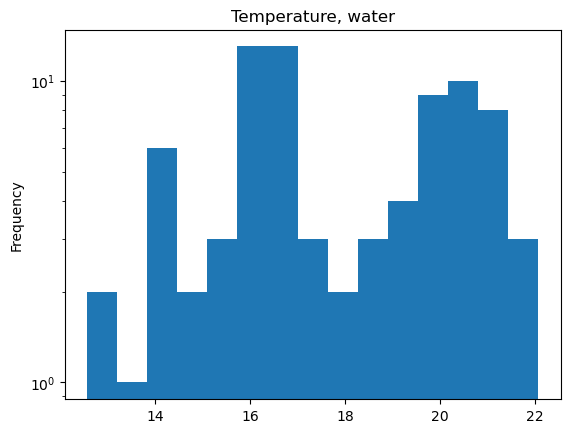

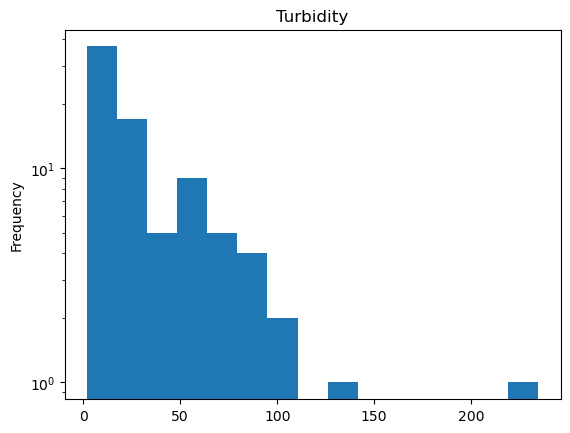

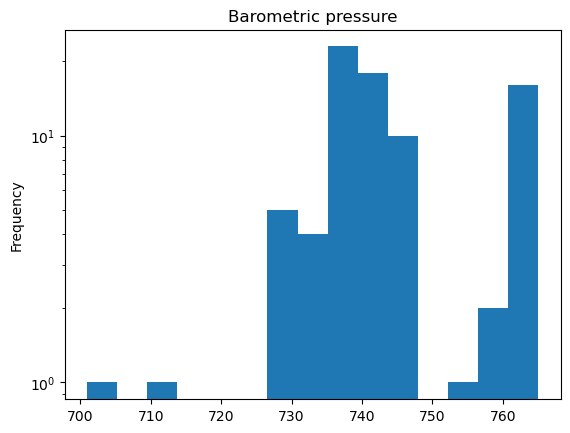

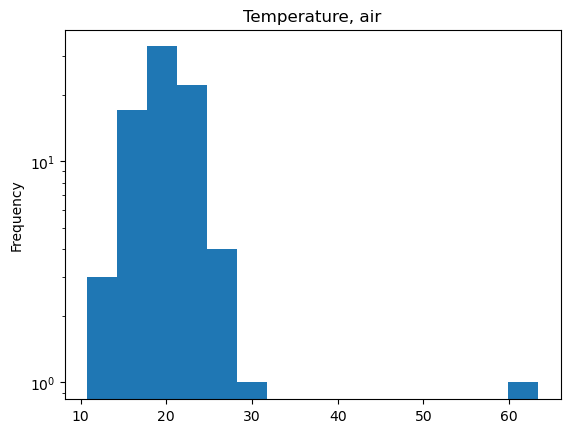

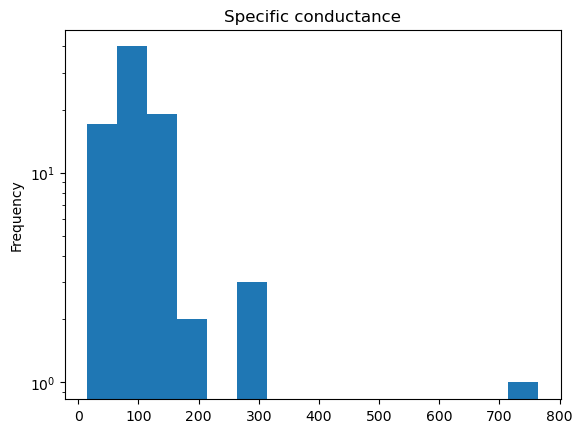

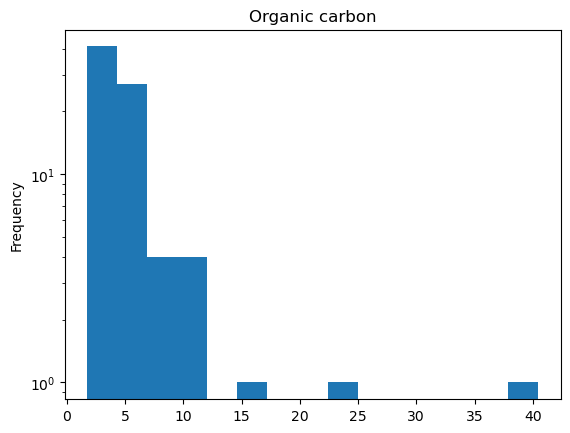

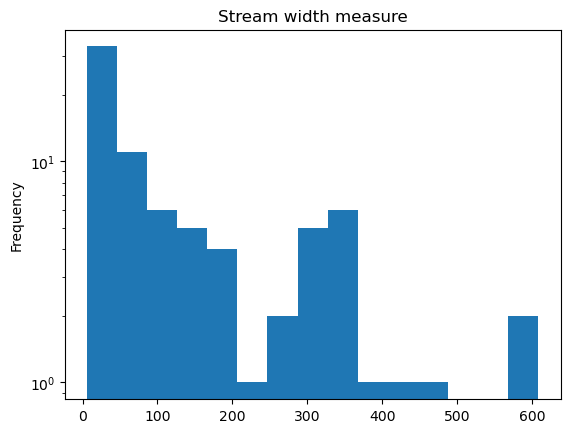

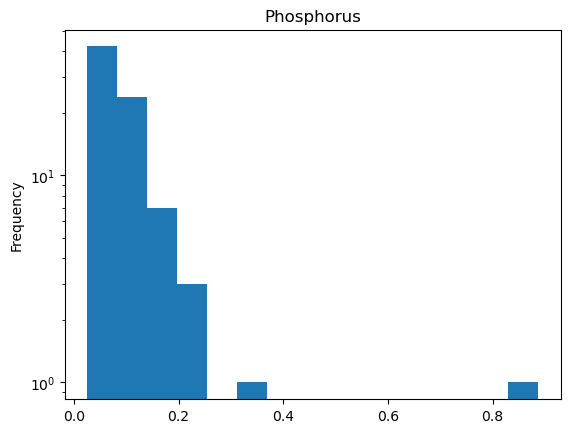

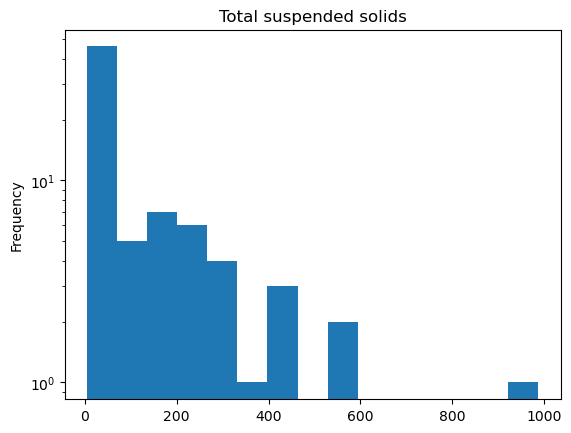

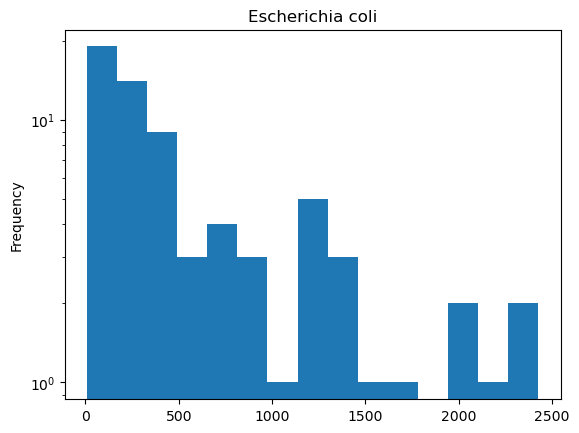

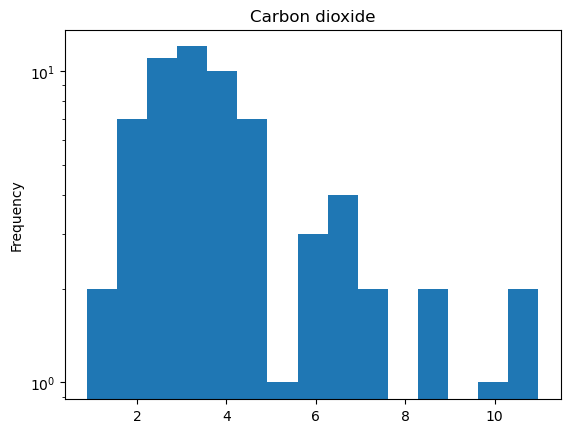

In [35]:
for col in merged_df:
    _ = plt.figure()
    _ = merged_df[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

In [36]:
merged_df.nsmallest(5, 'pH')

,Stream flow,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen,"Hardness, Ca, Mg",Dissolved oxygen (DO),pH,"Temperature, water",Turbidity,Barometric pressure,"Temperature, air",Specific conductance,Organic carbon,Stream width measure,Phosphorus,Total suspended solids,Escherichia coli,Carbon dioxide
Location_Identifier,,,,,,,,,,,,,,,,,,,
USGS-02314500,430.888889,NaN,0.932727,NaN,NaN,5.000000,6.437500,4.066667,20.787500,1.954545,763.750000,22.768750,64.888889,40.454545,312.083333,0.0250,20.600000,65.250,NaN
USGS-02226582,490.266667,3.040000,0.884545,0.257800,1.897655,17.363636,6.331250,6.166667,20.543750,5.681818,764.500000,25.700000,74.370370,23.090909,360.000000,0.0800,6.722222,184.750,10.933333
USGS-02334653,780.000000,NaN,NaN,NaN,NaN,NaN,9.133333,6.700000,12.633333,5.633333,735.250000,21.550000,72.666667,NaN,167.500000,NaN,NaN,NaN,NaN
USGS-02338523,77.988500,0.265556,0.150333,0.143333,-0.028111,7.898333,9.853846,6.725000,14.284615,NaN,736.307692,17.530769,28.208333,1.908000,33.669231,NaN,NaN,NaN,8.466667
USGS-02207400,15.226667,2.077500,0.491429,0.291667,1.294405,8.557143,7.530769,6.762500,20.892308,51.428000,735.769231,22.107143,43.400000,4.557143,14.416667,0.0845,161.857143,235.875,4.120000


There's no way that pH is 4.06667. I will drop it.

In [38]:
merged_df.at['USGS-02314500', 'Stream flow'] = merged_df['pH'].mean()

USGS-02226160's stream flow is erroneous. The decimal should shift to the left one.

In [40]:
merged_df.at['USGS-02226160', 'Stream flow'] = 1026.8250000

In [41]:
merged_df.nsmallest(5, 'Nitrogen')

,Stream flow,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen,"Hardness, Ca, Mg",Dissolved oxygen (DO),pH,"Temperature, water",Turbidity,Barometric pressure,"Temperature, air",Specific conductance,Organic carbon,Stream width measure,Phosphorus,Total suspended solids,Escherichia coli,Carbon dioxide
Location_Identifier,,,,,,,,,,,,,,,,,,,
USGS-02338523,77.988500,0.265556,0.150333,0.143333,-0.028111,7.898333,9.853846,6.725000,14.284615,NaN,736.307692,17.530769,28.208333,1.908000,33.669231,NaN,NaN,NaN,8.466667
USGS-02392360,12.793125,0.985000,0.856667,0.129900,-0.001567,18.818182,9.139286,7.253846,14.792857,6.354545,738.571429,16.317857,53.538462,3.109091,58.571429,0.032727,6.3,191.583333,2.866667
USGS-02335870,17.306000,0.663000,0.154286,0.522722,0.052750,34.800000,8.977273,7.122222,15.868182,7.733333,737.500000,14.631818,112.250000,1.741765,25.359091,0.036000,NaN,NaN,10.969231
USGS-02226160,1026.825000,0.525000,0.375500,0.186000,0.064889,39.566667,7.653846,7.154545,20.715385,21.000000,762.384615,25.692308,129.909091,6.974000,420.000000,0.055300,NaN,NaN,6.728571
USGS-02338000,3215.259259,2.489231,0.591923,1.985923,0.346750,30.416667,7.833333,7.070000,16.744444,25.400000,743.388889,16.770588,131.166667,2.533571,283.611111,0.086250,NaN,NaN,5.055556


There are two negative values for nitrogen. These are erroneous as they can't be measured in negative units. I will set them to zero.

In [43]:
merged_df.at['USGS-02338523', 'Nitrogen'] = 0
merged_df.at['USGS-02392360', 'Nitrogen'] = 0

In [44]:
merged_df.nlargest(5, 'Turbidity')

,Stream flow,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen,"Hardness, Ca, Mg",Dissolved oxygen (DO),pH,"Temperature, water",Turbidity,Barometric pressure,"Temperature, air",Specific conductance,Organic carbon,Stream width measure,Phosphorus,Total suspended solids,Escherichia coli,Carbon dioxide
Location_Identifier,,,,,,,,,,,,,,,,,,,
USGS-02334480,13.202381,7.312500,1.970000,0.611429,4.731071,24.285714,8.128571,7.092308,19.550000,234.474074,735.071429,22.766667,81.419231,6.212500,25.285714,0.323083,587.125000,1152.6,2.620000
USGS-02218565,9.400000,2.856667,1.373333,0.396000,1.087333,16.800000,8.427273,6.961905,18.854545,131.041667,734.727273,21.520000,60.300000,4.850000,26.181818,0.231500,986.500000,1390.0,2.750000
USGS-02207385,41.000000,4.101000,0.857143,0.645714,2.598143,10.357143,8.038462,6.816667,20.284615,106.576000,737.666667,23.341667,53.568000,5.257143,27.416667,0.191429,454.428571,310.0,3.100000
USGS-02203873,19.595405,3.581667,0.793333,0.541667,2.246667,21.166667,9.152632,7.037037,15.815789,102.286207,700.947368,63.370588,82.037037,3.783333,22.210526,0.227333,540.166667,1150.0,NaN
USGS-02208150,37.500000,5.250000,0.874000,0.407500,3.968500,19.500000,7.892308,6.975000,19.869231,94.940000,737.307692,21.810000,70.519048,4.220000,46.307692,0.192250,297.000000,805.0,3.166667


In [45]:
merged_df.nlargest(5, 'Temperature, air')

,Stream flow,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen,"Hardness, Ca, Mg",Dissolved oxygen (DO),pH,"Temperature, water",Turbidity,Barometric pressure,"Temperature, air",Specific conductance,Organic carbon,Stream width measure,Phosphorus,Total suspended solids,Escherichia coli,Carbon dioxide
Location_Identifier,,,,,,,,,,,,,,,,,,,
USGS-02203873,19.595405,3.581667,0.793333,0.541667,2.246667,21.166667,9.152632,7.037037,15.815789,102.286207,700.947368,63.370588,82.037037,3.783333,22.210526,0.227333,540.166667,1150.00,NaN
USGS-02394682,1.825000,NaN,0.320000,0.147000,NaN,NaN,9.300000,7.400000,15.550000,5.000000,739.500000,30.300000,91.500000,NaN,11.500000,NaN,NaN,NaN,NaN
USGS-02226582,490.266667,3.040000,0.884545,0.257800,1.897655,17.363636,6.331250,6.166667,20.543750,5.681818,764.500000,25.700000,74.370370,23.090909,360.000000,0.080000,6.722222,184.75,10.933333
USGS-02226160,1026.825000,0.525000,0.375500,0.186000,0.064889,39.566667,7.653846,7.154545,20.715385,21.000000,762.384615,25.692308,129.909091,6.974000,420.000000,0.055300,NaN,NaN,6.728571
USGS-02352560,1357.222222,1.685000,0.381111,0.362727,0.941162,25.363636,8.143750,7.318519,22.062500,17.972727,762.000000,25.343750,83.666667,5.863636,178.750000,0.059091,8.766667,10.50,2.916667


USGS-02203873 measure corresponds with Fahrenheit instead of usual Celsius.

In [47]:
merged_df.at['USGS-02203873', 'Temperature, air'] = 17.5

In [48]:
merged_df.nlargest(5, 'Specific conductance')

,Stream flow,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen,"Hardness, Ca, Mg",Dissolved oxygen (DO),pH,"Temperature, water",Turbidity,Barometric pressure,"Temperature, air",Specific conductance,Organic carbon,Stream width measure,Phosphorus,Total suspended solids,Escherichia coli,Carbon dioxide
Location_Identifier,,,,,,,,,,,,,,,,,,,
USGS-02334140,NaN,22.241667,3.220909,2.950909,16.069848,80.000000,7.557143,7.527027,21.010714,2.654545,729.857143,20.950000,764.076923,9.500000,25.230769,0.087273,9.675000,147.000000,6.216667
USGS-02393000,18.291667,18.675000,0.570909,5.345455,12.758636,82.181818,8.328571,7.358974,17.717857,13.027273,738.357143,15.192857,303.743590,6.054545,55.076923,0.056364,12.060000,170.416667,7.583333
USGS-02398037,64.060000,4.307000,0.392000,0.890000,3.025000,113.636364,8.716667,7.924348,16.783333,8.463636,744.916667,17.958333,293.478261,7.072727,114.416667,0.179091,17.536364,NaN,4.883333
USGS-03567340,27.481364,3.056250,0.270000,0.781818,2.004432,140.909091,8.250000,7.968966,16.261111,9.609091,742.555556,17.461111,279.172414,10.681818,51.000000,0.054545,12.300000,124.666667,3.825000
USGS-02387000,149.804545,1.820000,0.335000,0.285556,1.199444,87.000000,8.583333,7.786207,16.244444,16.454545,743.222222,12.061111,192.413793,6.672727,133.750000,0.060909,23.427273,208.833333,4.050000


USGS-02334140's specific conductance is quite high. I will drop it.

In [50]:
merged_df.at['USGS-02334140', 'Specific conductance'] = merged_df['Specific conductance'].mean()

In [51]:
merged_df.nlargest(5, 'Specific conductance')

,Stream flow,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Kjeldahl nitrogen,Inorganic nitrogen (nitrate and nitrite),Nitrogen,"Hardness, Ca, Mg",Dissolved oxygen (DO),pH,"Temperature, water",Turbidity,Barometric pressure,"Temperature, air",Specific conductance,Organic carbon,Stream width measure,Phosphorus,Total suspended solids,Escherichia coli,Carbon dioxide
Location_Identifier,,,,,,,,,,,,,,,,,,,
USGS-02393000,18.291667,18.675000,0.570909,5.345455,12.758636,82.181818,8.328571,7.358974,17.717857,13.027273,738.357143,15.192857,303.743590,6.054545,55.076923,0.056364,12.060000,170.416667,7.583333
USGS-02398037,64.060000,4.307000,0.392000,0.890000,3.025000,113.636364,8.716667,7.924348,16.783333,8.463636,744.916667,17.958333,293.478261,7.072727,114.416667,0.179091,17.536364,NaN,4.883333
USGS-03567340,27.481364,3.056250,0.270000,0.781818,2.004432,140.909091,8.250000,7.968966,16.261111,9.609091,742.555556,17.461111,279.172414,10.681818,51.000000,0.054545,12.300000,124.666667,3.825000
USGS-02387000,149.804545,1.820000,0.335000,0.285556,1.199444,87.000000,8.583333,7.786207,16.244444,16.454545,743.222222,12.061111,192.413793,6.672727,133.750000,0.060909,23.427273,208.833333,4.050000
USGS-02204520,608.568750,6.741667,0.388182,1.721818,4.631667,44.000000,8.494737,7.360000,17.126316,22.436364,743.578947,19.252632,169.800000,4.072727,155.846154,0.054545,27.936364,428.000000,3.816667


In [52]:
df.reset_index(drop=True, inplace=True)

In [53]:
df.shape

(51205, 98)

In [54]:
outpath = os.path.abspath(r"C:/Users/Dev/source/data analysis/data/interim/GA_yeardata.csv")
merged_df.to_csv(outpath)